<a href="https://colab.research.google.com/github/Hamdeep/Time-Series-Forecasting--Electricity_Load_Forecasting/blob/main/LSTM_Time_series_Forecasting_Electric_Power_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow

In [ ]:
import matplotlib as plt
import numpy as np

In [ ]:
import pandas as pd

df1=pd.read_csv('https://archive.ics.uci.edu/static/public/235/data.csv')

<ipython-input-5-99413848ed24>:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('https://archive.ics.uci.edu/static/public/235/data.csv')


In [ ]:
df=df1.copy()

In [ ]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


## Shortning Data

In [ ]:
df=df1[6::30]

In [ ]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6,16/12/2006,17:30:00,3.702,0.520,235.090,15.800,0.000,1.000,17.0
36,16/12/2006,18:00:00,2.790,0.180,237.520,11.800,0.000,0.000,18.0
66,16/12/2006,18:30:00,2.930,0.000,236.150,12.400,0.000,1.000,17.0
96,16/12/2006,19:00:00,4.070,0.088,231.990,17.400,0.000,1.000,17.0
126,16/12/2006,19:30:00,3.408,0.162,233.940,14.400,0.000,2.000,16.0
...,...,...,...,...,...,...,...,...,...
2075136,26/11/2010,19:00:00,1.81,0.0,235.59,7.6,0.0,0.0,0.0
2075166,26/11/2010,19:30:00,1.908,0.0,235.26,8.0,0.0,0.0,0.0
2075196,26/11/2010,20:00:00,1.456,0.0,238.18,6.2,0.0,2.0,0.0
2075226,26/11/2010,20:30:00,0.98,0.0,239.43,4.2,0.0,1.0,0.0


## Plotting Voltage Trend

In [ ]:
df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')
df = df.dropna(subset=['Voltage'])  # Drop rows with NaN in Voltage
vlt = df['Voltage']

<ipython-input-47-1f9d7abb0377>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Voltage'] = pd.to_numeric(df['Voltage'], errors='coerce')


In [ ]:
vlt.size

68306

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
vlt = pd.Series(scaler.fit_transform(vlt.values.reshape(-1, 1)).flatten())

<Axes: >

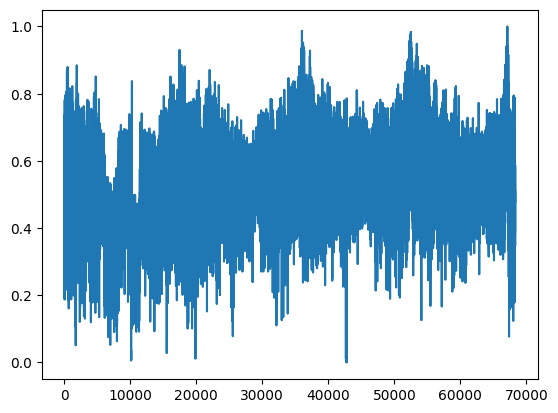

In [ ]:
vlt.plot()

## Creating Input for RNN

In [ ]:
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 10
X1, y1 = df_to_X_y(vlt, WINDOW_SIZE)
X1.shape, y1.shape

((68296, 10, 1), (68296,))

## Splitting Data into train,val,test

In [ ]:
X_train1, y_train1 = X1[:55000], y1[:55000]
X_val1, y_val1 = X1[55000:60000], y1[55000:60000]
X_test1, y_test1 = X1[60000:], y1[60000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((55000, 10, 1), (55000,), (5000, 10, 1), (5000,), (8296, 10, 1), (8296,))

## Setting up the Model

### Model1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((10, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_7 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp1 = ModelCheckpoint('model1/model.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=15, callbacks=[cp1])

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0561 - root_mean_squared_error: 0.2185 - val_loss: 0.0072 - val_root_mean_squared_error: 0.0847
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0078 - root_mean_squared_error: 0.0883 - val_loss: 0.0053 - val_root_mean_squared_error: 0.0727
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 0.0058 - root_mean_squared_error: 0.0762 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0693
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0052 - root_mean_squared_error: 0.0724 - val_loss: 0.0047 - val_root_mean_squared_error: 0.0684
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0049 - root_mean_squared_error: 0.0701 - val_loss: 0.0045 - val_root_mean_squared_error: 0.0671
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.0049 - root_mean_squared_error: 0.0700 - val_loss: 0.0044 - val_root_mean_squared_error: 0.0664
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/model.keras')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()

1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [ ]:
# Reshape to 2D for inverse_transform
train_predictions_original = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()
y_train1_original = scaler.inverse_transform(y_train1.reshape(-1, 1)).flatten()

# Create DataFrame with original values
train_results = pd.DataFrame({
    'Train Predictions': train_predictions_original,
    'Actuals': y_train1_original
})


In [ ]:
train_results

,Train Predictions,Actuals
0,236.903702,239.48
1,238.872757,238.90
2,239.036285,240.24
3,239.959930,242.73
4,241.793060,244.03
...,...,...
54995,243.583084,244.23
54996,243.708069,240.69
54997,241.279190,240.44
54998,240.736038,237.42


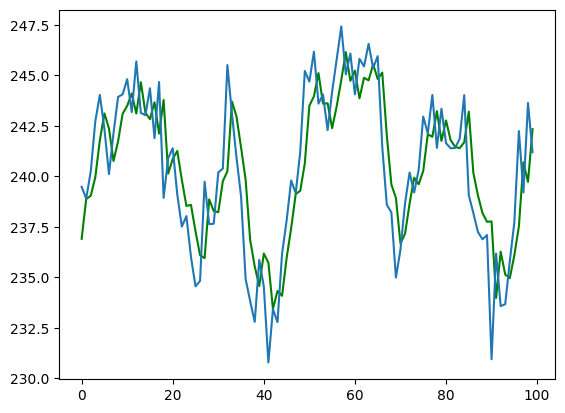

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100], c = 'g')
plt.plot(train_results['Actuals'][:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()

# Inverse transform to original voltage scale
val_predictions_original = scaler.inverse_transform(val_predictions.reshape(-1, 1)).flatten()
y_val1_original = scaler.inverse_transform(y_val1.reshape(-1, 1)).flatten()

# Create results DataFrame
val_results = pd.DataFrame({
    'Val Predictions': val_predictions_original,
    'Actuals': y_val1_original
})


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
val_results

,Val Predictions,Actuals
0,238.625473,240.11
1,239.955566,240.93
2,240.738724,240.65
3,240.747650,239.52
4,240.025970,239.49
...,...,...
4995,239.924683,238.11
4996,238.937378,239.38
4997,239.531021,237.29
4998,238.286804,237.72


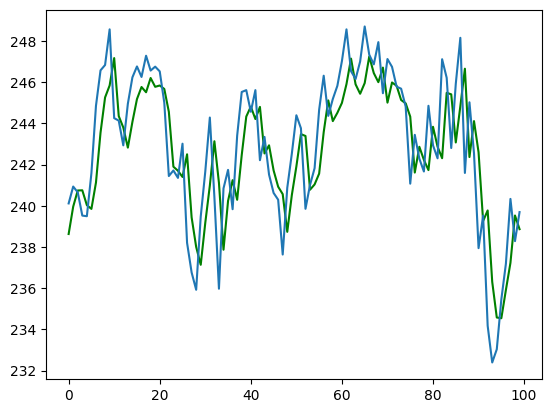

In [ ]:
plt.plot(val_results['Val Predictions'][:100],c='g')
plt.plot(val_results['Actuals'][:100])

In [112]:
test_predictions = model1.predict(X_test1).flatten()

# Inverse transform both predictions and actual values
test_predictions_original = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
y_test1_original = scaler.inverse_transform(y_test1.reshape(-1, 1)).flatten()

# Create DataFrame with original scale
test_results = pd.DataFrame({
    'Test Predictions': test_predictions_original,
    'Actuals': y_test1_original
})


260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [113]:
test_results

,Test Predictions,Actuals
0,240.273468,240.32
1,240.376068,234.57
2,236.802719,236.63
3,237.295334,240.92
4,239.981659,238.58
...,...,...
8291,238.863358,235.59
8292,237.083374,235.26
8293,236.483948,238.18
8294,238.097183,239.43


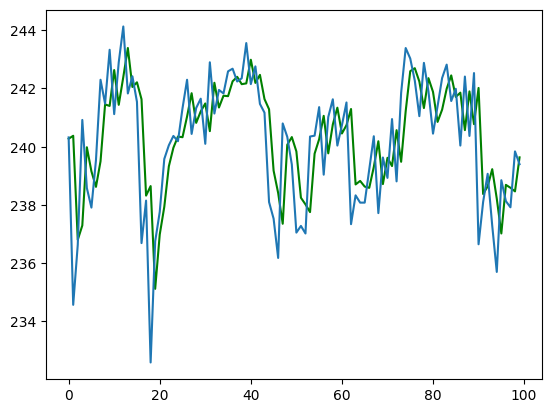

In [117]:
plt.plot(test_results['Test Predictions'][:100],c='g')
plt.plot(test_results['Actuals'][:100])

## Model 2

In [120]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=100, input_shape=(10, 1), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=50,return_sequences=True))  # Second LSTM layer
model.add(Dropout(0.3))
model.add(LSTM(units=50))  # Second LSTM layer
model.add(Dropout(0.3))
model.add(Dense(1))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 10, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_12 (LSTM)                  │ (None, 10, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,251 (356.45 KB)

 Trainable params: 91,251 (356.45 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
cp2 = ModelCheckpoint('model1/model2.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [122]:
model.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=15, callbacks=[cp1])

Epoch 1/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.0394 - root_mean_squared_error: 0.1856 - val_loss: 0.0087 - val_root_mean_squared_error: 0.0935
Epoch 2/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0130 - root_mean_squared_error: 0.1138 - val_loss: 0.0075 - val_root_mean_squared_error: 0.0867
Epoch 3/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.0109 - root_mean_squared_error: 0.1043 - val_loss: 0.0062 - val_root_mean_squared_error: 0.0788
Epoch 4/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0095 - root_mean_squared_error: 0.0973 - val_loss: 0.0060 - val_root_mean_squared_error: 0.0772
Epoch 5/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - loss: 0.0085 - root_mean_squared_error: 0.0922 - val_loss: 0.0052 - val_root_mean_squared_error: 0.0720
Epoch 6/15
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0076 - root_mean_squared_error: 0.0873 - val_loss: 0.0048 - val_root_mean_squared_error: 0.0694
Epoch 7/15
1719/1719 ━━━━━━━━━━━━━

In [123]:
from tensorflow.keras.models import load_model
model = load_model('model1/model2.keras')

### Training Pred

In [124]:
# Reshape to 2D for inverse_transform
train_predictions = model.predict(X_train1).flatten()
train_predictions_original = scaler.inverse_transform(train_predictions.reshape(-1, 1)).flatten()
y_train1_original = scaler.inverse_transform(y_train1.reshape(-1, 1)).flatten()

# Create DataFrame with original values
train_results = pd.DataFrame({
    'Train Predictions': train_predictions_original,
    'Actuals': y_train1_original
})


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


In [125]:
train_results

,Train Predictions,Actuals
0,236.844681,239.48
1,238.947388,238.90
2,239.081100,240.24
3,240.055908,242.73
4,241.968246,244.03
...,...,...
54995,243.595764,244.23
54996,243.734177,240.69
54997,241.302353,240.44
54998,240.796707,237.42


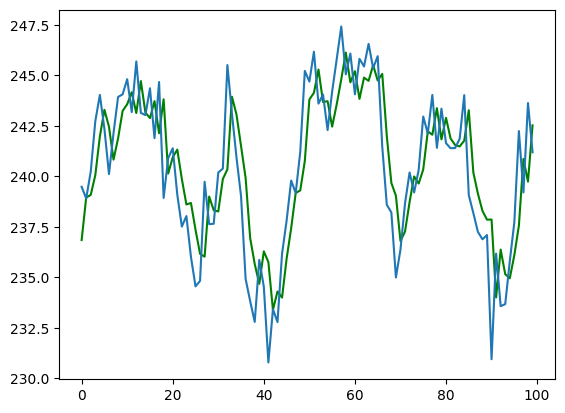

In [126]:
plt.plot(train_results['Train Predictions'][:100], c = 'g')
plt.plot(train_results['Actuals'][:100])

### Val Pred

In [127]:
val_predictions = model.predict(X_val1).flatten()

# Inverse transform to original voltage scale
val_predictions_original = scaler.inverse_transform(val_predictions.reshape(-1, 1)).flatten()
y_val1_original = scaler.inverse_transform(y_val1.reshape(-1, 1)).flatten()

# Create results DataFrame
val_results = pd.DataFrame({
    'Val Predictions': val_predictions_original,
    'Actuals': y_val1_original
})


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [128]:
val_results

,Val Predictions,Actuals
0,238.718872,240.11
1,240.029144,240.93
2,240.797058,240.65
3,240.791214,239.52
4,240.072815,239.49
...,...,...
4995,239.981949,238.11
4996,239.021301,239.38
4997,239.638718,237.29
4998,238.360519,237.72


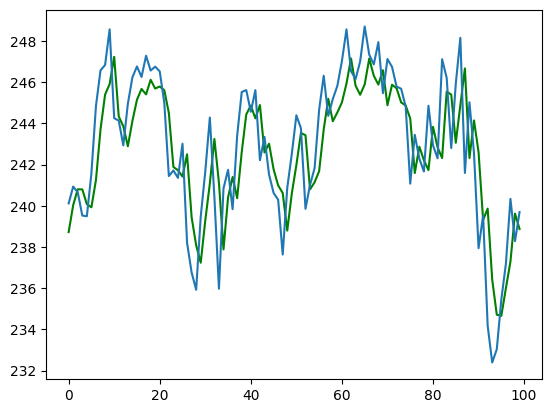

In [129]:
plt.plot(val_results['Val Predictions'][:100],c='g')
plt.plot(val_results['Actuals'][:100])

### Test Pred

In [130]:
test_predictions = model.predict(X_test1).flatten()

# Inverse transform both predictions and actual values
test_predictions_original = scaler.inverse_transform(test_predictions.reshape(-1, 1)).flatten()
y_test1_original = scaler.inverse_transform(y_test1.reshape(-1, 1)).flatten()

# Create DataFrame with original scale
test_results2 = pd.DataFrame({
    'Test Predictions': test_predictions_original,
    'Actuals': y_test1_original
})


260/260 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [131]:
test_results2

,Test Predictions,Actuals
0,240.394806,240.32
1,240.449448,234.57
2,236.798767,236.63
3,237.385025,240.92
4,240.151291,238.58
...,...,...
8291,238.954819,235.59
8292,237.129578,235.26
8293,236.546722,238.18
8294,238.205002,239.43


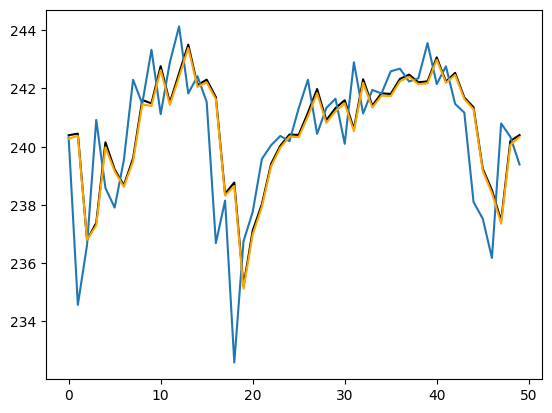

In [132]:
plt.plot(test_results2['Test Predictions'][:50],c='black')
plt.plot(test_results2['Actuals'][:50])
plt.plot(test_results['Test Predictions'][:50],c='orange')